In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#NLTK Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [138]:
naukri_jobs_df = pd.read_csv('naukri_jobs_data.csv')
naukri_jobs_df.head(3)

,job_post,company,company_rating,company_review,exp_required,salary_offered,job_location,job_description,required_skills,Posted_as_on_22_5_2022
0,Information Technology Executive,Marriott,4.2,(2907 Reviews),0-3 Yrs,Not disclosed,Bhopal,POSITION SUMMARY Troubleshoot and resolve tech...,Supervisor\nAdministration\nTactical planning\...,5 DAYS AGO
1,Associate Director-Information Technology(SAP),Unacademy,3.4,(544 Reviews),5-15 Yrs,Not disclosed,"Noida, Greater Noida",Support / manage timely delivery of custom dev...,Relationship management\nSAP MM\nPharma\nAnaly...,3 DAYS AGO
2,Lead - Information Technology,EchoIndia,4.0,(20 Reviews),11-13 Yrs,Not disclosed,Delhi / NCR,Experience in designing modern REST APIs that ...,Spring\nDocker\nSystem Design\nPaaS\nMicroserv...,1 DAY AGO


In [139]:
resume_df = pd.read_csv('resumes.csv')
resume_df.head(3)

,Text,Skills,Education,Experience,Additional_Information,Software_Developer,Front_End_Developer,Network_Administrator,Web_Developer,Project_manager,Database_Administrator,Security_Analyst,Systems_Administrator,Python_Developer,Java_Developer,Labels
0,Inova IT Helpdesk Technician Inova IT Helpdesk...,Training Networking (6 years) VOIP (3 years) ...,NaN,Inova IT Helpdesk Technician Inova Healthcare ...,CORE COMPETENCIES Tactical Data Network Perso...,0,0,1,0,0,0,1,0,0,0,"[2, 6]"
1,ServiceNow Administrator/ BA ServiceNow Admini...,NC SQL (6 years) Pharmaceutical Product Devel...,Masters in Computer Science Towson University ...,ServiceNow Administrator/ BA Sabre - Southlake...,Technical Skill Set ITSM Tools ServiceNow Ber...,1,0,0,0,0,0,0,0,1,0,"[8, 0]"
2,Oracle Database Administrator Oracle Database ...,databases (4 years) security (4 years) Oracle ...,Certification C.T.S.,Oracle Database Administrator TechWaze Solutio...,Technical Skills Provided 24x7 production sup...,0,0,0,0,0,1,0,0,0,0,[5]


In [140]:
#creating a copy of both dataframe

job_profiles = naukri_jobs_df
resume = resume_df

In [141]:
job_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32738 entries, 0 to 32737
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_post                32738 non-null  object 
 1   company                 32738 non-null  object 
 2   company_rating          32738 non-null  float64
 3   company_review          32738 non-null  object 
 4   exp_required            32738 non-null  object 
 5   salary_offered          32738 non-null  object 
 6   job_location            32738 non-null  object 
 7   job_description         32738 non-null  object 
 8   required_skills         32732 non-null  object 
 9   Posted_as_on_22_5_2022  32552 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.5+ MB


In [142]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29780 entries, 0 to 29779
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Text                    29780 non-null  object
 1   Skills                  25482 non-null  object
 2   Education               27720 non-null  object
 3   Experience              29778 non-null  object
 4   Additional_Information  15846 non-null  object
 5   Software_Developer      29780 non-null  int64 
 6   Front_End_Developer     29780 non-null  int64 
 7   Network_Administrator   29780 non-null  int64 
 8   Web_Developer           29780 non-null  int64 
 9   Project_manager         29780 non-null  int64 
 10  Database_Administrator  29780 non-null  int64 
 11  Security_Analyst        29780 non-null  int64 
 12  Systems_Administrator   29780 non-null  int64 
 13  Python_Developer        29780 non-null  int64 
 14  Java_Developer          29780 non-null  int64 
 15  La

In [143]:
# adding "id" column in both df, 

job_profiles['job_id'] = job_profiles.index
resume['resume_id'] = resume.index

In [144]:
# only extracting important colums and dropping other column 

jobs = job_profiles[['job_id','job_post','company','exp_required','job_description','required_skills']]
candidates = resume[['resume_id','Text','Skills','Education','Experience','Additional_Information']]

DATA PRE-PROCESSING - HANDLING NULL/DUPLICATE VALUES

In [145]:
jobs.isnull().sum()

job_id             0
job_post           0
company            0
exp_required       0
job_description    0
required_skills    6
dtype: int64

In [146]:
candidates.isnull().sum()

resume_id                     0
Text                          0
Skills                     4298
Education                  2060
Experience                    2
Additional_Information    13934
dtype: int64

In [147]:
jobs.dropna(inplace=True)
candidates.fillna('', inplace=True)

C:\Users\thumm\AppData\Local\Temp\ipykernel_30708\2211132714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs.dropna(inplace=True)
C:\Users\thumm\AppData\Local\Temp\ipykernel_30708\2211132714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates.fillna('', inplace=True)


In [148]:
jobs.isnull().sum()

job_id             0
job_post           0
company            0
exp_required       0
job_description    0
required_skills    0
dtype: int64

In [149]:
candidates.isnull().sum()

resume_id                 0
Text                      0
Skills                    0
Education                 0
Experience                0
Additional_Information    0
dtype: int64

In [150]:
jobs.drop_duplicates(inplace=True)
candidates.drop_duplicates(inplace=True)

C:\Users\thumm\AppData\Local\Temp\ipykernel_30708\2298100577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs.drop_duplicates(inplace=True)
C:\Users\thumm\AppData\Local\Temp\ipykernel_30708\2298100577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates.drop_duplicates(inplace=True)


In [151]:
jobs.to_csv('jobs_ui.csv', index=False)
candidates.to_csv('resume_ui.csv', index=False)

In [101]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thumm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thumm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thumm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [102]:
# Initialize the stemmer, lemmatizer, and stopwords list
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [103]:
def preprocessing_data(skill_string):
    # Convert the string to lowercase and split by commas
    words = skill_string.lower().split(',')
    
    # Initialize an empty list to hold processed words
    processed_words = []
    
    for word in words:
        word = word.strip()  # Remove leading/trailing spaces
        tokens = nltk.word_tokenize(word)  # Tokenize the word
        # Apply stemming, lemmatization, and stopword removal
        processed_tokens = [
            lemmatizer.lemmatize(stemmer.stem(token)) 
            for token in tokens 
            if token.isalpha() and token not in stop_words
        ]
        if processed_tokens:
            processed_words.append(' '.join(processed_tokens))
    
    # Join the processed words back into a comma-separated string
    return ', '.join(processed_words)


In [104]:
def preprocess_skills(skills_string):
    # Split the string by newline characters
    skills_list = skills_string.split('\n')
    # Remove spaces within each skill
    cleaned_skills = [skill.replace(" ", "") for skill in skills_list]
    return cleaned_skills

In [105]:
# skills column in resume dataframe is not having any fixed structure so to extract skills we need a REGEX 


import re

pattern = r'([A-Za-z\s]+)(?:\(\d+\syears\))?'

# Function to extract skills from a text string
def extract_skills(text):
    # Split the text into possible skill components
    components = text.split()  # Splitting at spaces
    
    # Join components back into phrases based on proximity and apply regex
    skills = []
    i = 0
    while i < len(components):
        # Look for sequences of words that match our pattern 
        match = re.match(pattern, ' '.join(components[i:]))
        if match:
            skill = match.group(1).strip()  # Extract the skill name
            skills.append(skill)
            # Advance the index by the number of words matched
            i += len(skill.split())
        else:
            i += 1  # Move to the next word if no match
    
    return list(set(skills))  # Remove duplicates and return

In [106]:
# TEXT column in resume is too large and applying above functions is taking too much time so we will just process first 50 words 

def preprocess_first_50_words(text):
    # Tokenize the string into word
    text = text[:100]
    
    words = nltk.word_tokenize(text.lower())  # Lowercase and tokenize
    
    # Only keep the first 50 words
    first_50_words = words[:50]
    
    # Process the first 50 words
    processed_words = [
        lemmatizer.lemmatize(stemmer.stem(word))
        for word in first_50_words
        if word.isalpha() and word not in stop_words
    ]
    
    # Combine the processed words back into a string
    return ' '.join(processed_words)

In [107]:
jobs['required_skills'] = jobs['required_skills'].apply(preprocessing_data)
jobs['required_skills'] = jobs['required_skills'].apply(lambda x:x.split())

jobs['job_description'] = jobs['job_description'].apply(preprocessing_data)
jobs['job_description'] = jobs['job_description'].apply(lambda x:x.split())

jobs['exp_required'] = jobs['exp_required'].apply(preprocess_skills)

C:\Users\thumm\AppData\Local\Temp\ipykernel_30708\3367656945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs['required_skills'] = jobs['required_skills'].apply(preprocessing_data)
C:\Users\thumm\AppData\Local\Temp\ipykernel_30708\3367656945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs['required_skills'] = jobs['required_skills'].apply(lambda x:x.split())
C:\Users\thumm\AppData\Local\Temp\ipykernel_30708\3367656945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [108]:
jobs['company_and_role'] = jobs['job_post'].apply(preprocess_skills) + jobs['company'].apply(preprocess_skills)
#we want to consider company and jobrole as wellfor filtering resumes as few resumes may have an internship or previous experience in same company which can have an advantage

C:\Users\thumm\AppData\Local\Temp\ipykernel_30708\2968518058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs['company_and_role'] = jobs['job_post'].apply(preprocess_skills) + jobs['company'].apply(preprocess_skills)


In [109]:
jobs['tags'] = jobs['company_and_role'] + jobs['exp_required'] + jobs['job_description'] + jobs['required_skills']

C:\Users\thumm\AppData\Local\Temp\ipykernel_30708\3299171531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs['tags'] = jobs['company_and_role'] + jobs['exp_required'] + jobs['job_description'] + jobs['required_skills']


In [110]:
jobs_preprocessed_df = jobs[['job_id','job_post','company','tags']]
jobs_preprocessed_df.head()

,job_id,job_post,company,tags
0,0,Information Technology Executive,Marriott,"[InformationTechnologyExecutive, Marriott, 0-3..."
1,1,Associate Director-Information Technology(SAP),Unacademy,"[AssociateDirector-InformationTechnology(SAP),..."
2,2,Lead - Information Technology,EchoIndia,"[Lead-InformationTechnology, EchoIndia, 11-13Y..."
3,3,Information Technology - Project Manager,Tata International,"[InformationTechnology-ProjectManager, TataInt..."
4,4,Information Technology Trainee,Stefanini,"[InformationTechnologyTrainee, Stefanini, 2-7Y..."


In [111]:
candidates['Skills'] = candidates['Skills'].apply(extract_skills)

candidates['Text'] = candidates['Text'].apply(preprocess_first_50_words)
candidates['Text'] = candidates['Text'].apply(lambda x:x.split())

candidates['Education'] = candidates['Education'].apply(preprocessing_data)
candidates['Education'] = candidates['Education'].apply(lambda x:x.split())

candidates['Additional_Information'] = candidates['Additional_Information'].apply(preprocessing_data)
candidates['Additional_Information'] = candidates['Additional_Information'].apply(lambda x:x.split())

candidates['Experience'] = candidates['Experience'].apply(preprocessing_data)
candidates['Experience'] = candidates['Experience'].apply(lambda x:x.split())

C:\Users\thumm\AppData\Local\Temp\ipykernel_30708\3138151561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates['Skills'] = candidates['Skills'].apply(extract_skills)
C:\Users\thumm\AppData\Local\Temp\ipykernel_30708\3138151561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates['Text'] = candidates['Text'].apply(preprocess_first_50_words)
C:\Users\thumm\AppData\Local\Temp\ipykernel_30708\3138151561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [112]:
candidates.head(3)

,resume_id,Text,Skills,Education,Experience,Additional_Information
0,0,"[inova, helpdesk, technician, inova, helpdesk,...","[Computer Skills Information Technology, VOIP,...",[],"[inova, helpdesk, technician, inova, healthcar...","[core, compet, tactic, data, network, person, ..."
1,1,"[servicenow, ba, servicenow, ba, servicenow, b...","[MYSQL, DATABASE, Pharmaceutical Product Devel...","[master, comput, scienc, towson, univers, jntu...","[servicenow, ba, sabr, southlak, tx, septemb, ...","[technic, skill, set, itsm, tool, servicenow, ..."
2,2,"[oracl, databas, administr, oracl, databas, ad...","[SQL, security, databases, years, Oracle, Data...",[certif],"[oracl, databas, administr, techwaz, solut, at...","[technic, skill, provid, product, support, ora..."


In [113]:
candidates['tags'] = candidates['Text'] + candidates['Skills'] + candidates['Education'] + candidates['Additional_Information'] + candidates['Experience']

C:\Users\thumm\AppData\Local\Temp\ipykernel_30708\638732863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates['tags'] = candidates['Text'] + candidates['Skills'] + candidates['Education'] + candidates['Additional_Information'] + candidates['Experience']


In [114]:
candidates = candidates[['resume_id','tags']]
candidates.head(3)

,resume_id,tags
0,0,"[inova, helpdesk, technician, inova, helpdesk,..."
1,1,"[servicenow, ba, servicenow, ba, servicenow, b..."
2,2,"[oracl, databas, administr, oracl, databas, ad..."


In [115]:
data = pd.DataFrame()
data['tags'] = pd.concat([jobs_preprocessed_df['tags'],candidates['tags']], axis=0).reset_index(drop=True)
data

,tags
0,"[InformationTechnologyExecutive, Marriott, 0-3..."
1,"[AssociateDirector-InformationTechnology(SAP),..."
2,"[Lead-InformationTechnology, EchoIndia, 11-13Y..."
3,"[InformationTechnology-ProjectManager, TataInt..."
4,"[InformationTechnologyTrainee, Stefanini, 2-7Y..."
...,...
62507,"[system, administr, system, administr, system,..."
62508,"[nexxgenesi, network, solut, product, manag, n..."
62509,"[databas, administr, databas, administr, datab..."
62510,"[specialist, specialist, specialist, fortitud,..."


In [116]:
data['tags'] = data['tags'].apply(lambda x:" ".join(x))
data['tags'] = data['tags'].apply(lambda x:x.lower())

In [117]:
data.to_csv('encoder_training_data.csv',index="False")

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [120]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data['tags']).toarray()

In [121]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
non_zero_count = np.count_nonzero(tfidf_matrix)
print(f"Number of non-zero elements: {non_zero_count}")

# Check the sparsity of the matrix
sparsity = 1 - non_zero_count / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])
print(f"Sparsity: {sparsity:.2f}")

Number of non-zero elements: 2471647
Sparsity: 0.99


In [123]:
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print a few feature names to inspect
print("Sample feature names:", feature_names[:10])

Sample feature names: ['07' '09' '0yrs' '10' '10yrs' '11' '11yrs' '12' '12yrs' '13']


In [124]:
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (62512, 5000)


In [125]:
# Inspect the first row of the TF-IDF matrix
print("First row TF-IDF values:", tfidf_matrix[0])

# Combine the feature names with their corresponding TF-IDF values
first_row_dict = dict(zip(feature_names, tfidf_matrix[0]))

# Print the non-zero TF-IDF values for the first document
non_zero_features = {word: tfidf_value for word, tfidf_value in first_row_dict.items() if tfidf_value > 0}
print("Non-zero TF-IDF values in the first row:", non_zero_features)

First row TF-IDF values: [0. 0. 0. ... 0. 0. 0.]
Non-zero TF-IDF values in the first row: {'3yrs': 0.22872270205092232, 'administr': 0.1399765185146757, 'alloc': 0.32279741199189455, 'execut': 0.2154098385665194, 'inform': 0.13604378931371477, 'issu': 0.2052057003443093, 'manag': 0.10156889953262029, 'plan': 0.1843029770660919, 'posit': 0.2356215443153351, 'problem': 0.2029769987544826, 'relat': 0.19994062353577818, 'resolv': 0.24567112783177986, 'resourc': 0.23103919983518015, 'schedul': 0.23211476540553208, 'server': 0.13646016803289965, 'summari': 0.26086584298912857, 'supervisor': 0.2672351501664257, 'support': 0.14747432017357232, 'tactic': 0.3493200890861771, 'technic': 0.12762973388168367, 'technolog': 0.12406497602285509, 'troubleshoot': 0.18640291575388687}


In [126]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the size of the latent space
latent_dim = 500 

# Define the autoencoder architecture
input_layer = Input(shape=(tfidf_matrix.shape[1],))
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)

encoded = Dense(latent_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(tfidf_matrix.shape[1], activation='sigmoid')(decoded)

# Build the autoencoder model
autoencoder = Model(input_layer, decoded)

# Build the encoder model (to extract latent features)
encoder = Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(tfidf_matrix, tfidf_matrix,
                          epochs=30,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2)


Epoch 1/30
196/196 [==============================] - 15s 67ms/step - loss: 0.0685 - val_loss: 0.0093
Epoch 2/30
196/196 [==============================] - 15s 79ms/step - loss: 0.0064 - val_loss: 0.0086
Epoch 3/30
196/196 [==============================] - 14s 70ms/step - loss: 0.0064 - val_loss: 0.0086
Epoch 4/30
196/196 [==============================] - 15s 76ms/step - loss: 0.0063 - val_loss: 0.0085
Epoch 5/30
196/196 [==============================] - 16s 81ms/step - loss: 0.0062 - val_loss: 0.0083
Epoch 6/30
196/196 [==============================] - 16s 81ms/step - loss: 0.0061 - val_loss: 0.0082
Epoch 7/30
196/196 [==============================] - 16s 83ms/step - loss: 0.0061 - val_loss: 0.0081
Epoch 8/30
196/196 [==============================] - 17s 87ms/step - loss: 0.0060 - val_loss: 0.0080
Epoch 9/30
196/196 [==============================] - 17s 86ms/step - loss: 0.0059 - val_loss: 0.0080
Epoch 10/30
196/196 [==============================] - 17s 86ms/step - loss: 0.005

In [127]:
latent_features = encoder.predict(tfidf_matrix)

1954/1954 [==============================] - 9s 5ms/step


In [128]:
latent_features.shape

(62512, 500)

In [129]:
np.save('latent_features.npy',latent_features)

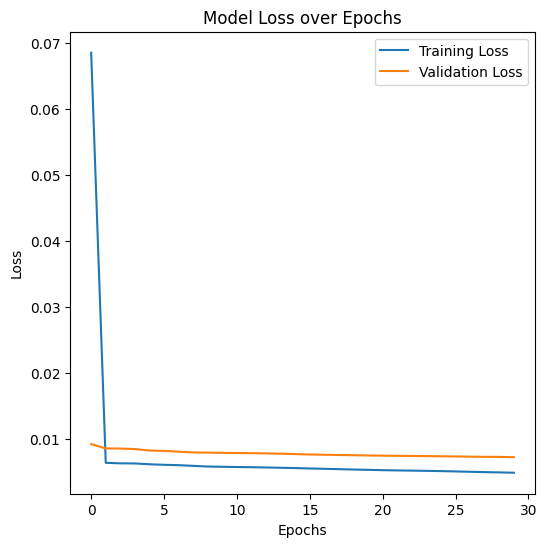

In [130]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()


1954/1954 [==============================] - 18s 9ms/step


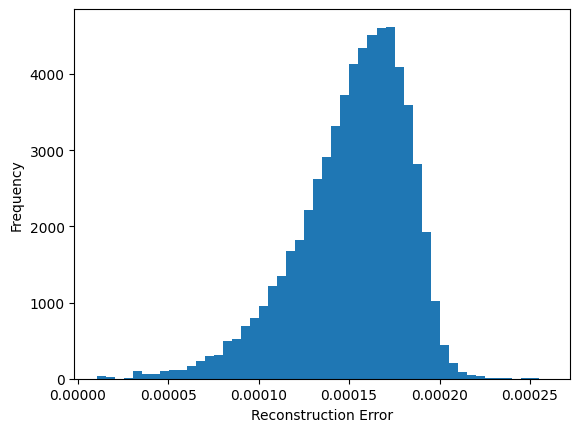

In [131]:
reconstruction_error = np.mean(np.square(tfidf_matrix - autoencoder.predict(tfidf_matrix)), axis=1)
plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

In [132]:
mse = np.mean(np.square(tfidf_matrix - autoencoder.predict(tfidf_matrix)))
print(f'Mean Squared Error: {mse}')

1954/1954 [==============================] - 18s 9ms/step
Mean Squared Error: 0.0001515778941150187


In [133]:
import pickle

In [134]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

In [135]:
encoder.save('autoencoder_model.h5')

C:\Users\thumm\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
